In [2]:
import pandas as pd
import textstat

temps = [0.2, 0.5, 0.7]

for t in temps:
    # Define file paths
    input_path = f"Result_RQ2/{t}_desc_RQ2.csv"
    output_path = f"Result_RQ2/{t}_desc_RQ2_fog.csv"

    # Load CSV
    df = pd.read_csv(input_path)

    # Compute Gunning Fog Index for each description
    df['fog_index'] = df['Generated_Description'].apply(textstat.gunning_fog)

    # Group by Source and compute mean
    avg_fog_by_source = df.groupby('Source')['fog_index'].mean()

    # Print results
    print(f"\nTemperature {t}")
    for tier, value in avg_fog_by_source.items():
        print(f"Avg_Fog_{tier.capitalize()} = {value:.2f}")

    # Save results if needed
    df.to_csv(output_path, index=False)



Temperature 0.2
Avg_Fog_Bottom = 18.81
Avg_Fog_Middle = 18.11
Avg_Fog_Top = 16.85

Temperature 0.5
Avg_Fog_Bottom = 18.86
Avg_Fog_Middle = 18.14
Avg_Fog_Top = 16.89

Temperature 0.7
Avg_Fog_Bottom = 18.76
Avg_Fog_Middle = 18.19
Avg_Fog_Top = 16.95



Temperature 0.2
Avg_Fog_Bottom = 18.81
Avg_Fog_Middle = 18.11
Avg_Fog_Top = 16.85

Temperature 0.5
Avg_Fog_Bottom = 18.86
Avg_Fog_Middle = 18.14
Avg_Fog_Top = 16.89

Temperature 0.7
Avg_Fog_Bottom = 18.76
Avg_Fog_Middle = 18.19
Avg_Fog_Top = 16.95


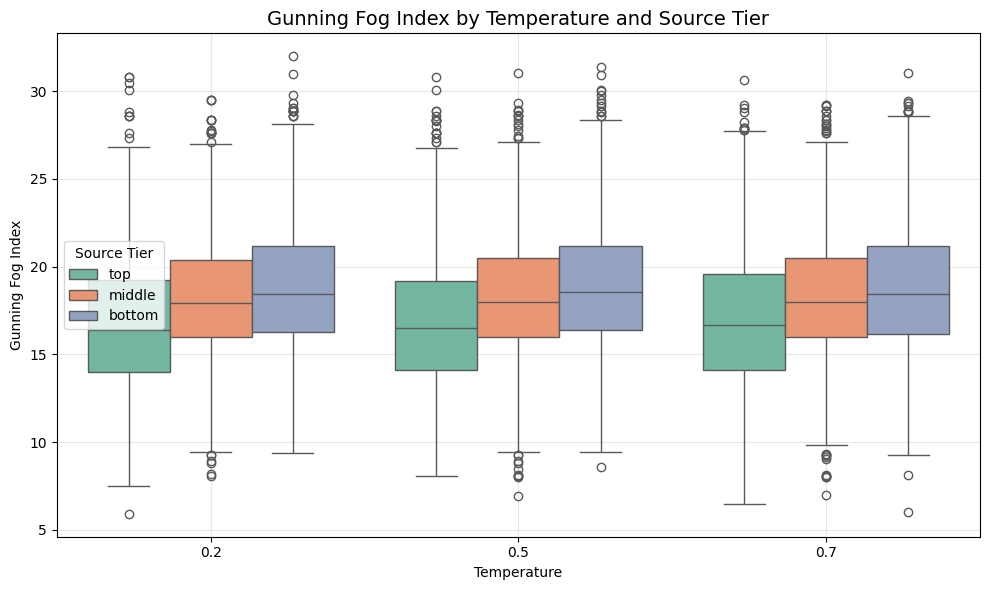

In [4]:
import pandas as pd
import textstat
import matplotlib.pyplot as plt
import seaborn as sns

temps = [0.2, 0.5, 0.7]
combined_df = pd.DataFrame()  # to collect all temps for one big plot

for t in temps:
    # File paths
    input_path = f"Result_RQ2/{t}_desc_RQ2.csv"
    output_path = f"Result_RQ2/{t}_desc_RQ2_fog.csv"

    # Load CSV
    df = pd.read_csv(input_path)

    # Compute Gunning Fog Index
    df['fog_index'] = df['Generated_Description'].apply(textstat.gunning_fog)
    df['Temperature'] = t  # add temp label for grouping

    # Append to combined DataFrame
    combined_df = pd.concat([combined_df, df], ignore_index=True)

    # Group by Source and compute mean (for quick print summary)
    avg_fog_by_source = df.groupby('Source')['fog_index'].mean()

    print(f"\nTemperature {t}")
    for tier, value in avg_fog_by_source.items():
        print(f"Avg_Fog_{tier.capitalize()} = {value:.2f}")

    # Save each with Fog Index
    df.to_csv(output_path, index=False)

# ---- Create boxplot ----
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x='Temperature', y='fog_index', hue='Source', palette='Set2')

plt.title('Gunning Fog Index by Temperature and Source Tier', fontsize=14)
plt.xlabel('Temperature')
plt.ylabel('Gunning Fog Index')
plt.legend(title='Source Tier')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()
